In [5]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 30.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


라이브러리 임포트

In [1]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup

import re
import time
from pytz import timezone
import datetime

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

네이버 연애 공감별 랭킹뉴스 크롤링(좋아요, 응원해요,축하해요,기대해요, 놀랐어요, 슬퍼요)

In [2]:
# 1) 데이터 프레임 생성
data = pd.DataFrame(columns=['순위','공감종류','기사제목','기사링크','기사내용','공감수','수집일자'])

# 2) 네이버 연애 공감별 랭킹 뉴스 URL
url = ['https://entertain.naver.com/ranking/sympathy',
       'https://entertain.naver.com/ranking/sympathy/cheer',
       'https://entertain.naver.com/ranking/sympathy/congrats',
       'https://entertain.naver.com/ranking/sympathy/expect',
       'https://entertain.naver.com/ranking/sympathy/surprise',
       'https://entertain.naver.com/ranking/sympathy/sad']

sympathy=['love','cheer','congrats','expect','surprise','sad']
for i in range(len(url)):

  # 3) URL에서 HTML 가져오기
  html = urlopen(url[i])

  # 4) HTML 파싱하여 변환
  soup = BeautifulSoup(html, 'html.parser', from_encoding='UTF-8')

  # 5) 네이버 공감별 랭킹뉴스 정보가 있는 li태그 가져오기 -'_inc_news_lst3_rank_reply'
  li = soup.select('li._inc_news_lst3_rank_reply') # ==soup.find_all('li),{'calss':'_inc_news_lst3_rank_reply'}

  for index_l in range(0,len(li)):
    try:
      #순위
      rank = li[index_l].find('em',{'class':'blind'}).text
      
      #뉴스 제목
      title = li[index_l].find('a',{'class':'tit'}).text
      
      #뉴스내용
      summary = li[index_l].find('p',{'class':'summary'}).text
      
      # 뉴스링크
      link = li[index_l].find('a').attrs['href']

      # 공감수
      cnt =  li[index_l].find('a',{'class':'likeitnews_item_likeit'}).text.replace('\n','')
      cnt = re.sub(r'[^0-9]','',cnt)
      

      # 7) dataframe 저장
      data= data.append({'순위': rank,
                        '공감종류': sympathy[i],
                        '기사제목': title,
                        '기사링크': link,
                        '기사내용': summary,
                        '공감수': cnt,
                        '수집일자': datetime.datetime.now(timezone('Asia/seoul')).strftime('%Y-%m-%d %H:%M:%S')},ignore_index=True)
    
    except:
      pass

  print('Complets of'+rank+':'+title)

print('-------------------------------------------------------')
print(data)

Complets of30:이찬원, '옥탑방의 문제아들' MC 합류…정형돈 "올해 대상 유력" [RE:TV]
Complets of30:김우석, 5월 27일 첫 팬콘 개최…로맨스 판타지 비주얼 포스터
Complets of30:‘화밤’ 김영옥→임영웅 찐팬 고백에 장민호 “팬분들이 있어 더 힘나” 행운요정 등장
Complets of30:故문빈 마지막 메시지 "내 소중한 사람들에게.." 먹먹해지네
Complets of30:추자현, 제시카 출연한 中 예능 나가더니...과감한 무대의상 [룩@차이나]
Complets of30:임영웅, 공식 팬카페 '영웅시대' 회원 20만명까지 1만명 남았다
-------------------------------------------------------
     순위  공감종류                                               기사제목  \
0     1  love               임영웅, 공식 팬카페 '영웅시대' 회원 20만명까지 1만명 남았다   
1     2  love         'No.1 영웅시대', 임영웅 공식팬카페 회원수 19만명 돌파[★FOCUS]   
2     3  love               임영웅, 팬카페 '영웅시대' 회원 수 19만 명 돌파…20만 육박   
3     4  love                         임영웅이 밀고 영웅시대가 끈다…19만 회원 돌파   
4     5  love                임영웅, 공식 팬카페 '영웅시대' 역대급 회원 19만명 '최다'   
..   ..   ...                                                ...   
175  26   sad           아스트로 문빈, 자택서 숨진 채 발견 '향년 25세'…빈소는 서울아산병원   
176  27   sad                       [전문] 아스트로 문빈 사망, 소속사 “충격·비통”   
177  2

In [3]:
data

,순위,공감종류,기사제목,기사링크,기사내용,공감수,수집일자
0,1,love,"임영웅, 공식 팬카페 '영웅시대' 회원 20만명까지 1만명 남았다",/ranking/read?oid=312&aid=0000606987,지난 4월 19일 임영웅의 공식 팬카페 ‘영웅시대’는 2017년 5월12일 팬카페 ...,6404,2023-04-20 16:32:27
1,2,love,"'No.1 영웅시대', 임영웅 공식팬카페 회원수 19만명 돌파[★FOCUS]",/ranking/read?oid=108&aid=0003145999,'No.1 영웅시대'다. 가수 임영웅 공식팬카페 '영웅시대'가 회원수 19만 명 시...,6104,2023-04-20 16:32:27
2,3,love,"임영웅, 팬카페 '영웅시대' 회원 수 19만 명 돌파…20만 육박",/ranking/read?oid=311&aid=0001583410,임영웅 팬카페 '영웅시대'가 팬카페 회원 수 19만 명을 돌파했다. 4월 20일 기...,5468,2023-04-20 16:32:27
3,4,love,임영웅이 밀고 영웅시대가 끈다…19만 회원 돌파,/ranking/read?oid=021&aid=0002567570,가수 임영웅의 공식 팬카페 ‘영웅시대’의 회원수가 19만 명을 돌파했다. 그 규모 ...,5434,2023-04-20 16:32:27
4,5,love,"임영웅, 공식 팬카페 '영웅시대' 역대급 회원 19만명 '최다'",/ranking/read?oid=629&aid=0000212689,19일 기준…2017년 5월12일 팬카페 개설 이후 만 6년만에 봉사와 기부 '선한...,5150,2023-04-20 16:32:27
...,...,...,...,...,...,...,...
175,26,sad,"아스트로 문빈, 자택서 숨진 채 발견 '향년 25세'…빈소는 서울아산병원",/ranking/read?oid=117&aid=0003720829,그룹 아스트로 멤버 문빈이 사망했다. 향년 25세. 서울 강남경찰서에 따르면 19일...,36,2023-04-20 16:32:33
176,27,sad,"[전문] 아스트로 문빈 사망, 소속사 “충격·비통”",/ranking/read?oid=144&aid=0000881649,그룹 아스트로의 멤버 문빈이 세상을 떠났다고 소속사 판타지오가 20일 밝혔다. 향년...,34,2023-04-20 16:32:33
177,28,sad,"문빈, 최근 라이브 방송 보니...""내가 선택한 직업이니 행복해야지""",/ranking/read?oid=416&aid=0000294546,"아스트로 멤버 문빈이 스물다섯 짧은 생을 마감해 충격을 준 가운데, 최근 팬들과 한...",34,2023-04-20 16:32:33
178,29,sad,"[할리웃POP]레이첼 맥아담스, 겨드랑이 털 파격 화보 찍은 이유 ""자연스러운 아름다움""",/ranking/read?oid=112&aid=0003626850,레이첼 맥아담스가 파격 화보를 공개했다. 겨드랑이 털을 인증한 것. 20일(한국시간...,33,2023-04-20 16:32:33


워드클라우드 만들기

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

import konlpy
from wordcloud import WordCloud


원하는 공감을 선택하세요('love','cheer','congrats','expect','surprise','sad')sad


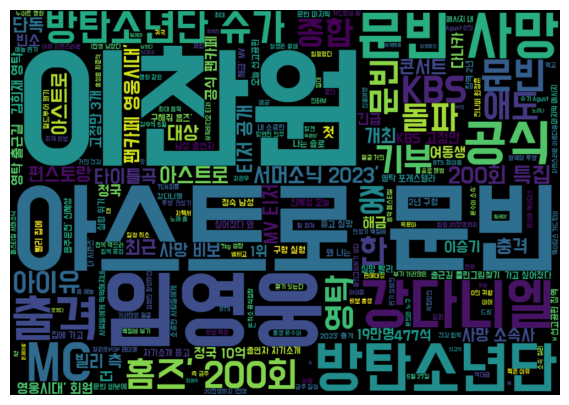

In [16]:

st=input("원하는 공감을 선택하세요('love','cheer','congrats','expect','surprise','sad')")
st_df = sympathy==st

# 워드클라우드를 위한 기사제목 text로 변환
text = " ".join(li for li in data['기사제목'].astype(str))

# 한글폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(15,5))
wordcloud = WordCloud(width=1000, height=700, font_path=font_path).generate(text)

plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()